## Purpose

The purpose of this script is to build and evaluate a **linear regression model** that predicts the **quality of red wine** based on its physicochemical properties. This is a classic supervised regression problem in machine learning.

## Dataset

* Name: Wine Quality Dataset (Red Wine)
* Source: UCI Machine Learning Repository
    * https://archive.ics.uci.edu/dataset/186/wine+quality
* Attributes:
    * Features (inputs): 11 physicochemical variables such as **fixed acidity**, **volatile acidity**, **citric acid**, **residual sugar**, etc.
    * Target (output): quality — a **score between 0 and 10** (integer) representing wine quality rated by experts.

## Main Features of the Code

* Loads a real-world dataset from an online source.
* Prepares the data by separating features and target variable.
* Splits the data into training and testing sets.
* Trains a Linear Regression model using scikit-learn.
* Evaluates model performance using:
* R² Score (coefficient of determination)
* Mean Squared Error (MSE)
* Visualizes the results using a scatter plot to compare actual vs. predicted quality scores.

## Import Libraries

* pandas for data handling
* scikit-learn for ML modeling
* matplotlib for plotting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Load Data

* Reads a CSV file directly from the UCI repository.
* sep=';' because the dataset uses semicolons as delimiters.

In [2]:
# Load dataset
data = pd.read_csv("Dataset/winequality-red.csv", sep=';')

# Show the first few rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Prepare Data

* Drops the quality column from the features X.
* Sets y as the target variable (quality).

In [4]:
# Feature and target
X = data.drop("quality", axis=1)
y = data["quality"]

## Split Dataset

* train_test_split with an 80/20 split.
* random_state=1 ensures reproducibility.

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train Model

A LinearRegression model is created and trained on X_train, y_train.

In [6]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict and Evaluate:

* Predictions are made on the test set.
* Performance is measured using R² and MSE.

In [7]:
# Predictions
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.32664027269868434
MSE: 0.3830719815814272


## Visualization

* A scatter plot shows the relationship between actual and predicted wine quality.
* This helps visually assess the model's accuracy.

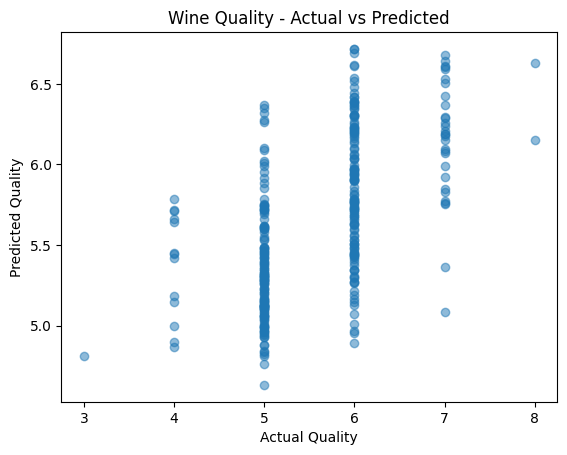

In [8]:
# Visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Wine Quality - Actual vs Predicted")
plt.show()